## Traffic Speeds - Eli
This dataset includes information gathered in various traffic studies about the speed of traffic in Pittsburgh.

In [84]:
import pandas as pd

traffic = pd.read_csv("traffic.csv", index_col="_id")

In [13]:
print("Neighborhoods in dataset: " + str(len(traffic['neighborhood'].unique())))
print(traffic['neighborhood'].unique())

Neighborhoods in dataset: 75
['Polish Hill' 'Central Lawrenceville' 'Windgap' 'Squirrel Hill South'
 'Perry North' 'Central Northside' 'Squirrel Hill North' 'Central Oakland'
 'East Liberty' 'Greenfield' 'Bluff' 'Crafton Heights' 'Shadyside'
 'Upper Lawrenceville' 'Highland Park' 'North Shore' 'Mount Washington'
 'Brookline' 'South Shore' 'South Side Flats' 'Bloomfield' 'Larimer'
 'Friendship' 'South Oakland' 'Point Breeze' 'Westwood' 'Regent Square'
 'Knoxville' 'Strip District' 'West Oakland' 'Beechview'
 'South Side Slopes' 'Upper Hill' 'North Oakland' 'Stanton Heights'
 'Manchester' 'Morningside' 'Hazelwood' 'Lower Lawrenceville' 'Overbrook'
 'East Hills' 'Duquesne Heights' 'Lincoln-Lemington-Belmar' 'Sheraden'
 'Elliott' 'Central Business District' 'St. Clair' 'Perry South' 'Carrick'
 'Allegheny Center' 'East Allegheny' 'Chateau' 'Swisshelm Park'
 'Allegheny West' 'Marshall-Shadeland' 'Arlington' 'Homewood North'
 'Homewood South' 'Point Breeze North' 'California-Kirkbride'
 'Belt

First, this is just the total number of observations gathered for each neighborhood.

<Axes: title={'center': 'Total Observations Per Neighborhood'}, xlabel='neighborhood'>

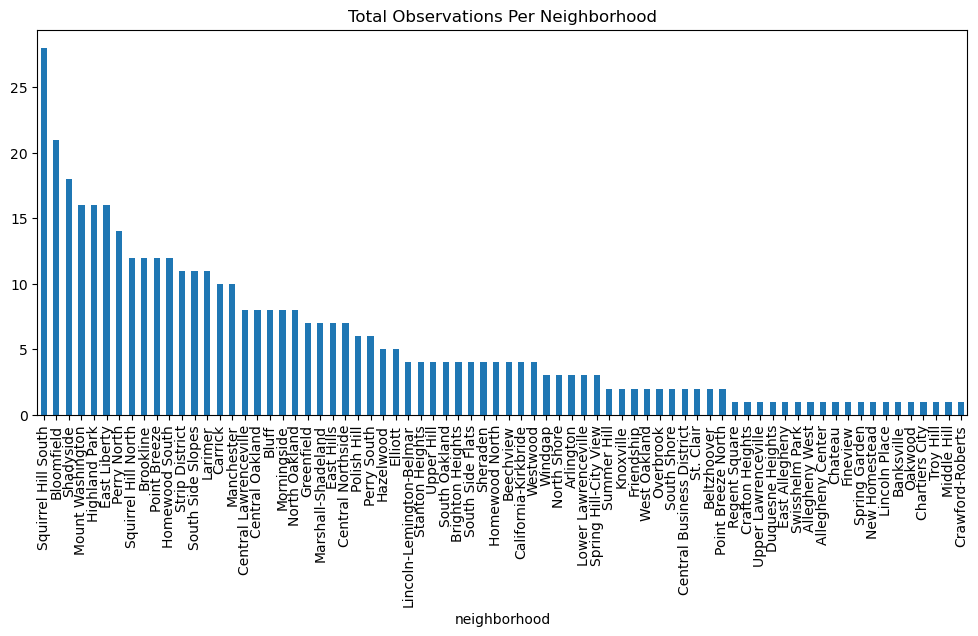

In [111]:
totalObs = traffic['neighborhood'].value_counts()
totalObs.plot.bar(title="Total Observations Per Neighborhood", figsize=(12, 5))

I found the number of streets where the median speed is less than the speed limit. This is to find streets where drivers feel the need to go even slower than the posted speed limit, implying that the road is bad or hard to drive on.

In [112]:
trueDict = {}

queryMask = traffic['median_speed'] < traffic['speed_limit']

for index, row in traffic.iterrows():
    currentRow = row['neighborhood']
    if queryMask[index] == True:
        if currentRow not in trueDict:
            trueDict[currentRow] = 1
        else:
            trueDict[currentRow] = trueDict[currentRow] + 1

<Axes: title={'center': 'Observed Streets where: Median Speed < Speed Limit'}>

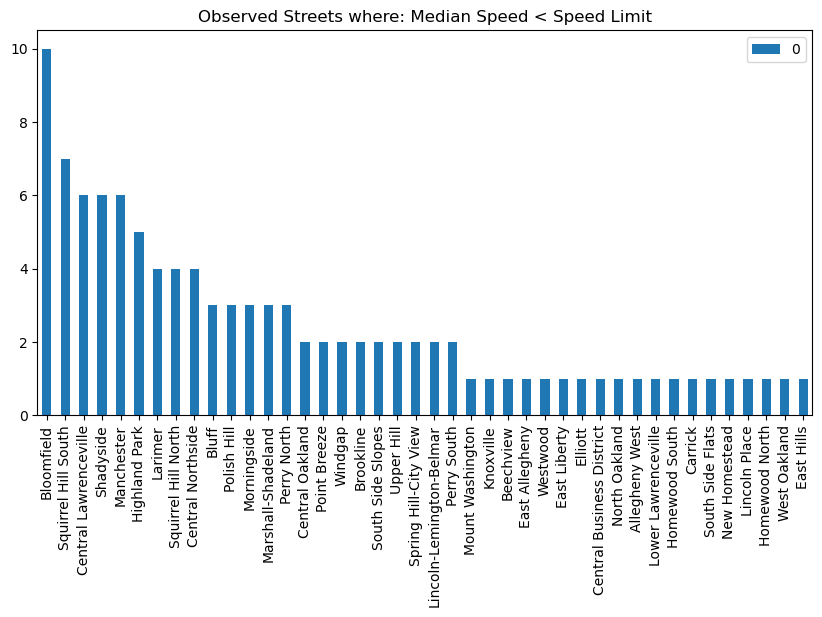

In [107]:
trueData = pd.DataFrame.from_dict(trueDict, orient='index')
trueData = trueData.sort_values(by=0, ascending=False)
trueData.plot.bar(title = "Observed Streets where: Median Speed < Speed Limit", figsize=(10, 5))

In [109]:
slowPercent = {}

# divide trueDict values by totalObs values to find percentage of streets that the median is lower than the limit for each neighborhood
for key in trueDict:
    slowPercent[key] = trueDict[key] / totalObs.loc[key]

<Axes: title={'center': 'Percent of Observed Streets where: Median Speed < Speed Limit'}>

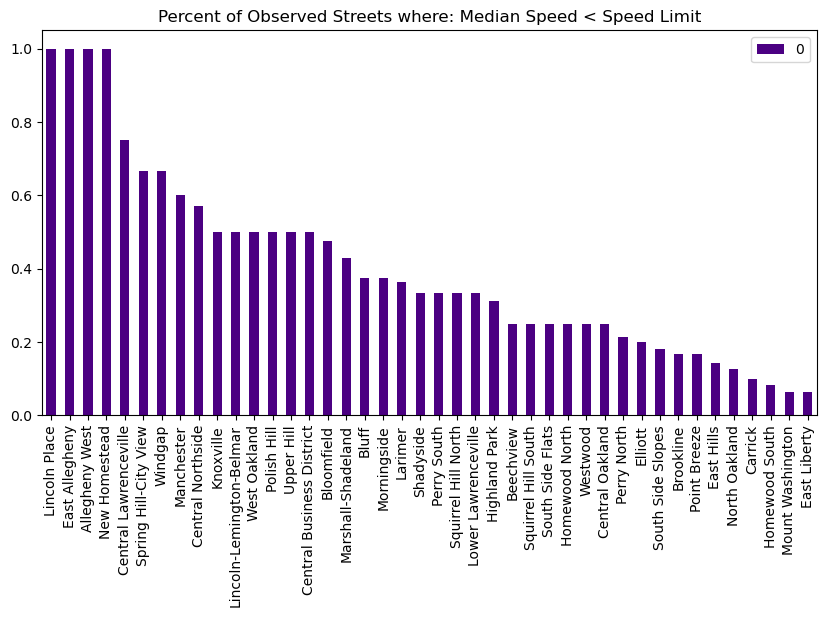

In [120]:
slowData = pd.DataFrame.from_dict(slowPercent, orient='index')
slowData = slowData.sort_values(by=0, ascending=False)
slowData.plot.bar(title = "Percent of Observed Streets where: Median Speed < Speed Limit", figsize=(10, 5), color='indigo')

#### Final Results
1st (tied) - Lincoln Place, East Allegheny, Allegheny West, New Homestead

5th - Central Lawerenceville

This chart shows four neighborhoods tied for first, but these only had one observation to work with. 
Central Lawrenceville has a high percentage, and is in the top half of total observations with 8.
So, I'd Say this metric's best is Central Lawrenceville.